In [1]:
import pickle

In [2]:
with open("../data/nonpsychotic_posts.pickle", "rb") as p:
    nonpsychotic_posts = pickle.load(p)

In [3]:
len(list(nonpsychotic_posts.items())[2][1])

78

In [4]:
nonpsychotic_sample = list(nonpsychotic_posts.items())[2][1][0]["text"].lower()

In [5]:
print(nonpsychotic_sample)

serious question. i'll explain further below. wondering if a team member can offer some insight here.

this has happened to me at least twice now:

* i  pre-ordered the new marvel villainous board game expansion months ago from [target.com](https://target.com) while there was an active circle deal for buy 2 get 1 free on all disney toys. these deals often apply to preorders, so i always tend to scoop up the preorders i know i'll want later while these good circle deals are active. the game retails $24.99, i got it for about $16.49 (because a b2g1 free deal essentially balances out to 33% off each item for return value).
* the game arrived today - several months later - in a box that was a very tight fit, with absolutely no padding at all (just the game box inside another empty cardboard box) - as a result of the way it was packed, one of the corners was very damaged/dented.
* i took it to the store (same day it arrived) - literally still in the same shipping box, so i can show them the

In [6]:
import os
import stanza
from stanza.server import CoreNLPClient

/home/rain/Documents/GRIS/venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
os.environ["CORENLP_HOME"] = "/home/rain/.stanfordnlp_resources/stanford-corenlp-4.1.0"

In [8]:
client = CoreNLPClient(timeout=150000000, be_quiet=True, annotators=['openie'], endpoint='http://localhost:1234')
client.start()
doc = client.annotate(nonpsychotic_sample, output_format="json")
triples = []
for sentence in doc['sentences']:
    for triple in sentence['openie']:
        triples.append({
           'subject': triple['subject'],
           'relation': triple['relation'],
            'object': triple['object']
        })
client.stop()

2022-08-01 17:55:07 INFO: Writing properties to tmp file: corenlp_server-199109f6ba5647f9.props
2022-08-01 17:55:07 INFO: Starting server with command: java -Xmx5G -cp /home/rain/.stanfordnlp_resources/stanford-corenlp-4.1.0/* edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 1234 -timeout 150000000 -threads 5 -maxCharLength 100000 -quiet True -serverProperties corenlp_server-199109f6ba5647f9.props -annotators openie -preload -outputFormat serialized


In [9]:
import networkx as nx
import matplotlib.pyplot as plt

In [10]:
g = nx.DiGraph()
for triplet in triples:
    g.add_edge(triplet["subject"], triplet["object"], relation=triplet["relation"])

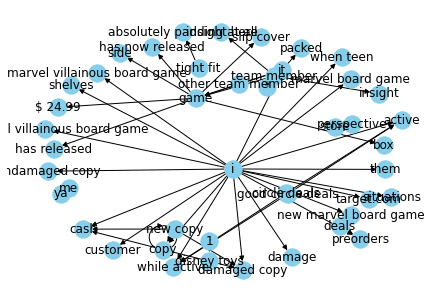

In [11]:
nx.draw(g, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues)

In [12]:
g.nodes

NodeView(('team member', 'insight here', 'insight', 'i', 'new marvel board game', 'target.com', 'marvel board game', '1', 'disney toys', 'marvel villainous board game', 'new marvel villainous board game', 'circle deals', 'active', 'while active', 'deals', 'preorders', 'good circle deals', 'it', 'game', '$ 24.99', 'packed', 'tight fit', 'absolutely padding at all', 'box', 'damage', 'them', '*', 'shelves', 'copy', 'has released', 'undamaged copy', 'has now released', 'side', 'other team member', 'slip cover', 'damaged copy', 'new copy', 'cash', 'ya', 'me', 'when teen', 'situations', 'customer', 'store', 'perspective'))

In [13]:
g.edges

OutEdgeView([('team member', 'insight here'), ('team member', 'insight'), ('team member', 'it'), ('team member', 'game'), ('i', 'new marvel board game'), ('i', 'target.com'), ('i', 'marvel board game'), ('i', 'marvel villainous board game'), ('i', 'new marvel villainous board game'), ('i', 'while active'), ('i', 'preorders'), ('i', 'active'), ('i', 'it'), ('i', 'damage'), ('i', 'them'), ('i', 'shelves'), ('i', 'copy'), ('i', 'undamaged copy'), ('i', 'damaged copy'), ('i', 'cash'), ('i', 'when teen'), ('i', 'situations'), ('i', 'customer'), ('1', 'disney toys'), ('circle deals', 'active'), ('circle deals', 'while active'), ('deals', 'preorders'), ('good circle deals', 'active'), ('good circle deals', 'while active'), ('it', 'packed'), ('game', '$ 24.99'), ('game', 'box'), ('game', 'has released'), ('game', 'has now released'), ('game', 'side'), ('game', 'slip cover'), ('game', 'it'), ('tight fit', 'absolutely padding at all'), ('*', 'it'), ('copy', 'damaged copy'), ('copy', 'copy'), ('c

In [14]:
for relation in g.edges.data("relation"):
    print(relation)

('team member', 'insight here', 'can offer')
('team member', 'insight', 'can offer')
('team member', 'it', 'looking')
('team member', 'game', 'takes')
('i', 'new marvel board game', 'pre-ordered')
('i', 'target.com', 'pre-ordered marvel board game from')
('i', 'marvel board game', 'pre-ordered')
('i', 'marvel villainous board game', 'pre-ordered')
('i', 'new marvel villainous board game', 'pre-ordered')
('i', 'while active', "'ll want")
('i', 'preorders', 'scoop up')
('i', 'active', "'ll want later")
('i', 'it', "'d seen earlier")
('i', 'damage', 'can show')
('i', 'them', 'can see off')
('i', 'shelves', "'d seen earlier on")
('i', 'copy', 'simply return')
('i', 'undamaged copy', 'can exchange for')
('i', 'damaged copy', 'return')
('i', 'cash', 'pay')
('i', 'when teen', 'was')
('i', 'situations', 'see')
('i', 'customer', 'see situations from')
('1', 'disney toys', 'free on')
('circle deals', 'active', 'are')
('circle deals', 'while active', 'are')
('deals', 'preorders', 'often apply to'

In [15]:
nx.node_connectivity(g)

0

In [16]:
nx.number_connected_components(g.to_undirected())

5

In [17]:
nx.number_strongly_connected_components(g)

45

In [18]:
nx.number_weakly_connected_components(g)

5

In [19]:
degree_centrality = nx.degree_centrality(g)
for k, v in degree_centrality.items():
    print(f"{k}: {v}")

team member: 0.09090909090909091
insight here: 0.022727272727272728
insight: 0.022727272727272728
i: 0.4318181818181818
new marvel board game: 0.022727272727272728
target.com: 0.022727272727272728
marvel board game: 0.022727272727272728
1: 0.022727272727272728
disney toys: 0.022727272727272728
marvel villainous board game: 0.022727272727272728
new marvel villainous board game: 0.022727272727272728
circle deals: 0.045454545454545456
active: 0.06818181818181818
while active: 0.06818181818181818
deals: 0.022727272727272728
preorders: 0.045454545454545456
good circle deals: 0.045454545454545456
it: 0.13636363636363635
game: 0.20454545454545456
$ 24.99: 0.022727272727272728
packed: 0.022727272727272728
tight fit: 0.022727272727272728
absolutely padding at all: 0.022727272727272728
box: 0.022727272727272728
damage: 0.022727272727272728
them: 0.022727272727272728
*: 0.022727272727272728
shelves: 0.022727272727272728
copy: 0.13636363636363635
has released: 0.022727272727272728
undamaged copy: 

In [20]:
avg_degree_centrality = sum(list(degree_centrality.values())) / len(list(degree_centrality.values()))
print(f"Average degree centrality: {avg_degree_centrality}")

Average degree centrality: 0.04949494949494951


In [21]:
in_degree_centrality = nx.in_degree_centrality(g)
for k, v in in_degree_centrality.items():
    print(f"{k}: {v}")

team member: 0.0
insight here: 0.022727272727272728
insight: 0.022727272727272728
i: 0.0
new marvel board game: 0.022727272727272728
target.com: 0.022727272727272728
marvel board game: 0.022727272727272728
1: 0.0
disney toys: 0.022727272727272728
marvel villainous board game: 0.022727272727272728
new marvel villainous board game: 0.022727272727272728
circle deals: 0.0
active: 0.06818181818181818
while active: 0.06818181818181818
deals: 0.0
preorders: 0.045454545454545456
good circle deals: 0.0
it: 0.11363636363636365
game: 0.045454545454545456
$ 24.99: 0.022727272727272728
packed: 0.022727272727272728
tight fit: 0.0
absolutely padding at all: 0.022727272727272728
box: 0.022727272727272728
damage: 0.022727272727272728
them: 0.022727272727272728
*: 0.0
shelves: 0.022727272727272728
copy: 0.06818181818181818
has released: 0.022727272727272728
undamaged copy: 0.022727272727272728
has now released: 0.022727272727272728
side: 0.022727272727272728
other team member: 0.0
slip cover: 0.02272727

In [22]:
avg_in_degree_centrality = sum(list(in_degree_centrality.values())) / len(list(in_degree_centrality.values()))
print(f"Average in degree centrality: {avg_in_degree_centrality}")

Average in degree centrality: 0.024747474747474737


In [23]:
out_degree_centrality = nx.out_degree_centrality(g)
for k, v in out_degree_centrality.items():
    print(f"{k}: {v}")

team member: 0.09090909090909091
insight here: 0.0
insight: 0.0
i: 0.4318181818181818
new marvel board game: 0.0
target.com: 0.0
marvel board game: 0.0
1: 0.022727272727272728
disney toys: 0.0
marvel villainous board game: 0.0
new marvel villainous board game: 0.0
circle deals: 0.045454545454545456
active: 0.0
while active: 0.0
deals: 0.022727272727272728
preorders: 0.0
good circle deals: 0.045454545454545456
it: 0.022727272727272728
game: 0.1590909090909091
$ 24.99: 0.0
packed: 0.0
tight fit: 0.022727272727272728
absolutely padding at all: 0.0
box: 0.0
damage: 0.0
them: 0.0
*: 0.022727272727272728
shelves: 0.0
copy: 0.06818181818181818
has released: 0.0
undamaged copy: 0.0
has now released: 0.0
side: 0.0
other team member: 0.045454545454545456
slip cover: 0.0
damaged copy: 0.0
new copy: 0.06818181818181818
cash: 0.0
ya: 0.022727272727272728
me: 0.0
when teen: 0.0
situations: 0.0
customer: 0.0
store: 0.022727272727272728
perspective: 0.0


In [24]:
avg_out_degree_centrality = sum(list(out_degree_centrality.values())) / len(list(out_degree_centrality.values()))
print(f"Average out degree centrality: {avg_out_degree_centrality}")

Average out degree centrality: 0.02474747474747474


In [25]:
eigen = nx.eigenvector_centrality(g, max_iter=2000)
for k, v in eigen.items():
    print(f"{k}: {v}")

team member: 2.8677298367300344e-09
insight here: 7.742870559171093e-08
insight: 7.742870559171093e-08
i: 2.8677298367300344e-09
new marvel board game: 7.742870559171093e-08
target.com: 7.742870559171093e-08
marvel board game: 7.742870559171093e-08
1: 2.8677298367300344e-09
disney toys: 7.742870559171093e-08
marvel villainous board game: 7.742870559171093e-08
new marvel villainous board game: 7.742870559171093e-08
circle deals: 2.8677298367300344e-09
active: 2.2655065710167254e-07
while active: 2.2655065710167254e-07
deals: 2.8677298367300344e-09
preorders: 1.5198968134669176e-07
good circle deals: 2.8677298367300344e-09
it: 2.2396970024861586e-06
game: 1.5198968134669176e-07
$ 24.99: 1.9414530994662334e-06
packed: 1.964968484127421e-05
tight fit: 2.8677298367300344e-09
absolutely padding at all: 7.742870559171093e-08
box: 1.9414530994662334e-06
damage: 7.742870559171093e-08
them: 7.742870559171093e-08
*: 2.8677298367300344e-09
shelves: 7.742870559171093e-08
copy: 0.5773502690701147
ha

In [26]:
avg_eigen = sum(list(eigen.values())) / len(list(eigen.values()))
print(f"Average eigenvector centrality: {avg_eigen}")

Average eigenvector centrality: 0.03849081178935379


In [27]:
closeness_centrality = nx.closeness_centrality(g)
for k, v in closeness_centrality.items():
    print(f"{k}: {v}")

team member: 0.0
insight here: 0.022727272727272728
insight: 0.022727272727272728
i: 0.0
new marvel board game: 0.022727272727272728
target.com: 0.022727272727272728
marvel board game: 0.022727272727272728
1: 0.0
disney toys: 0.022727272727272728
marvel villainous board game: 0.022727272727272728
new marvel villainous board game: 0.022727272727272728
circle deals: 0.0
active: 0.06818181818181818
while active: 0.06818181818181818
deals: 0.0
preorders: 0.045454545454545456
good circle deals: 0.0
it: 0.11363636363636363
game: 0.045454545454545456
$ 24.99: 0.0409090909090909
packed: 0.07438016528925619
tight fit: 0.0
absolutely padding at all: 0.022727272727272728
box: 0.0409090909090909
damage: 0.022727272727272728
them: 0.022727272727272728
*: 0.0
shelves: 0.022727272727272728
copy: 0.045454545454545456
has released: 0.0409090909090909
undamaged copy: 0.022727272727272728
has now released: 0.0409090909090909
side: 0.0409090909090909
other team member: 0.0
slip cover: 0.0409090909090909
d

In [28]:
avg_closeness_centrality = sum(list(closeness_centrality.values())) / len(list(closeness_centrality.values()))
print(f"Average closeness centrality: {avg_closeness_centrality}")

Average closeness centrality: 0.027814508723599623
